# Task 1: Understanding CNNs

# Understanding CNNs

## Advantages of Convolutional Layers Over Fully Connected Layers

Convolutional layers offer several advantages over fully connected layers, especially in image processing tasks:

1. **Parameter Sharing**: Convolutional layers use filters (kernels) that are applied across the entire input image, allowing the same weights to be used for different parts of the image. This significantly reduces the number of parameters compared to fully connected layers, where each input pixel is connected to every neuron.

2. **Spatial Hierarchy**: Convolutional layers preserve the spatial relationship between pixels by applying filters that capture local features. This spatial hierarchy allows CNNs to detect edges, textures, and more complex patterns in different parts of the image.

3. **Translation Invariance**: Convolutional layers can detect features regardless of their position in the image. This property allows CNNs to recognize objects in different locations within the image, contributing to better generalization.

4. **Reduced Computational Cost**: By using shared weights and local receptive fields, convolutional layers reduce the number of computations compared to fully connected layers, making them more efficient for processing large images.

## How Pooling Reduces Computational Complexity

Pooling layers help in reducing the computational complexity of a CNN by:

1. **Dimensionality Reduction**: Pooling operations reduce the spatial dimensions (width and height) of the input feature maps. This reduction in size decreases the number of parameters and computations required in subsequent layers.

2. **Feature Extraction**: Pooling layers retain the most significant features while discarding less important information. This helps in focusing on the essential characteristics of the image and simplifies the data for the network.

3. **Reduced Risk of Overfitting**: By lowering the resolution of feature maps, pooling reduces the risk of overfitting. It ensures that the network does not become overly sensitive to small variations in the input.

## Comparison of Pooling Layers

### Max Pooling

- **Description**: Max pooling selects the maximum value from a pool of values (e.g., a 2x2 region) and discards the rest.
- **Advantages**:
  - **Preserves Important Features**: Captures the most prominent features and retains critical information.
  - **Translation Invariance**: Helps the network be invariant to small translations and distortions in the image.
- **Disadvantages**:
  - **Loss of Information**: Can discard useful information when the maximum value does not represent the overall feature well.

### Average Pooling

- **Description**: Average pooling computes the average value of the pool of values and uses it as the representative value.
- **Advantages**:
  - **Smoother Representation**: Provides a more generalized representation by averaging values, which can be beneficial for certain tasks.
  - **Less Likely to Overfit**: Reduces the risk of overfitting by smoothing out feature maps.
- **Disadvantages**:
  - **Less Sensitive to Important Features**: May not capture strong features as effectively as max pooling, potentially leading to loss of important information.

Each pooling method has its own strengths and is chosen based on the specific requirements of the CNN architecture and the task at hand.


# Task 2: Implementing a CNN

# A Simple CNN on the MNIST Dataset

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.8543 - loss: 0.4754 - val_accuracy: 0.9810 - val_loss: 0.0624
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 0.9878 - val_loss: 0.0425
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9867 - val_loss: 0.0462
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9968 - loss: 0.0107 - 

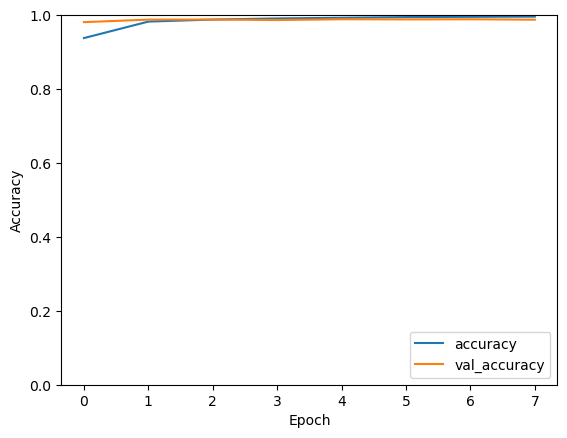

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Use Input layer for specifying input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('mnist_cnn.keras', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# CNN Model for MNIST Classification

## Code Explanation

### Import Libraries

```python
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
```

- `tensorflow` and `keras` for building and training the CNN.
- `mnist` for the dataset.
- `EarlyStopping` and `ModelCheckpoint` to prevent overfitting and save the best model.
- `matplotlib.pyplot` for plotting training history.

### Load and Preprocess Data

```python
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
```

- Load and preprocess the MNIST data. Reshape images to `(28, 28, 1)` and normalize pixel values.

### Define the CNN Model

```python
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```

- Build a Sequential CNN model with three convolutional layers, max pooling, and dense layers for classification.

### Compile the Model

```python
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
```

- Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.

### Define Callbacks

```python
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('mnist_cnn.keras', save_best_only=True)
```

- Define callbacks to stop training early if validation loss doesn't improve and to save the best model.

### Train the Model

```python
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])
```

- Train the model for 10 epochs with a batch size of 64 and validation split of 20%.

### Evaluate the Model

```python
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
```

- Evaluate the model on the test set and print the test accuracy.

### Plot Training History

```python
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
```

- Plot training and validation accuracy over epochs.

## Output

```
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.8543 - loss: 0.4754 - val_accuracy: 0.9810 - val_loss: 0.0624
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 0.9878 - val_loss: 0.0425
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9867 - val_loss: 0.0462
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 0.9877 - val_loss: 0.0437
313/313 - 2s - 5ms/step - accuracy: 0.9896 - loss: 0.0379
Test accuracy: 0.9896000027656555
```

- **Epochs 1-8**: Training accuracy improves, and validation accuracy remains high.
- **Test accuracy**: 98.96%, indicating the model performs well on unseen data.
```


# A Simple CNN for a Binary Classification (Pet Images Classification)

Invalid image file: PetImages\Cat\666.jpg, Error: cannot identify image file 'C:\\Users\\HP\\Desktop\\bytewise fellowship\\week 9\\PetImages\\Cat\\666.jpg'
Invalid image file: PetImages\Dog\11702.jpg, Error: cannot identify image file 'C:\\Users\\HP\\Desktop\\bytewise fellowship\\week 9\\PetImages\\Dog\\11702.jpg'
Found 2 invalid image files. Removing them...
Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 529s 838ms/step - accuracy: 0.6127 - loss: 0.6857 - val_accuracy: 0.7593 - val_loss: 0.4925
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 839ms/step - accuracy: 0.7752 - loss: 0.4722 - val_accuracy: 0.7967 - val_loss: 0.4346
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 443s 707ms/step - accuracy: 0.8255 - loss: 0.3877 - val_accuracy: 0.8111 - val_loss: 0.4204
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 534ms/step - accuracy: 0.8674 - loss: 0.3098 - val_accuracy: 0.8245 - val_loss: 0.4049
Epoch 5/15
625/625 ━━━━━━

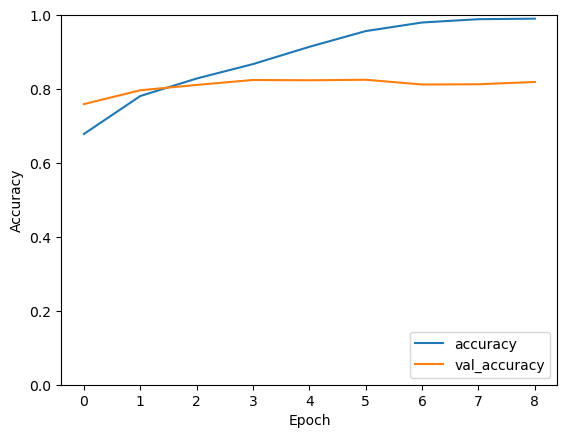

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define constants
batch_size = 32
img_height, img_width = 150, 150

# Directory path
dataset_path = 'PetImages'

# Function to validate images in the dataset
def check_images(directory):
    invalid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify the image file
            except (IOError, SyntaxError) as e:
                invalid_files.append(file_path)
                print(f"Invalid image file: {file_path}, Error: {e}")

    if not invalid_files:
        print("All images are valid.")
    else:
        print(f"Found {len(invalid_files)} invalid image files. Removing them...")
        for file_path in invalid_files:
            os.remove(file_path)

# Check and clean images in the dataset
check_images(dataset_path)

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Set up data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('cat_vs_dog_cnn.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_generator, 
    epochs=15, 
    validation_data=validation_generator, 
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


n
# CNN Model for Pet Images Classification

## Code Explanation

### Import Libraries

```python
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import os
```

- **TensorFlow/Keras**: For building and training the CNN.
- **ImageDataGenerator**: For data preprocessing and augmentation.
- **EarlyStopping** and **ModelCheckpoint**: To handle overfitting and save the best model.
- **Matplotlib**: For plotting training history.
- **PIL**: For image handling and verification.
- **OS**: For interacting with the filesystem.

### Define Constants

```python
batch_size = 32
img_height, img_width = 150, 150
dataset_path = 'PetImages'
```

- **batch_size**: Number of images to process in each training step.
- **img_height, img_width**: Dimensions to which images are resized.
- **dataset_path**: Path to the dataset directory.

### Function to Validate Images

```python
def check_images(directory):
    invalid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify the image file
            except (IOError, SyntaxError) as e:
                invalid_files.append(file_path)
                print(f"Invalid image file: {file_path}, Error: {e}")

    if not invalid_files:
        print("All images are valid.")
    else:
        print(f"Found {len(invalid_files)} invalid image files. Removing them...")
        for file_path in invalid_files:
            os.remove(file_path)
```

- **check_images**: Validates images in the dataset directory. Invalid images are identified and removed.

### Data Preprocessing

```python
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
```

- **ImageDataGenerator**: Rescales pixel values to [0, 1] and splits data into training and validation sets.
- **train_generator**: Provides batches of images for training.
- **validation_generator**: Provides batches of images for validation.

### Define the CNN Model

```python
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
```

- **Model Architecture**: 
  - **Conv2D Layers**: Extract features from images.
  - **MaxPooling2D Layers**: Reduce the spatial dimensions of feature maps.
  - **Flatten Layer**: Convert 2D feature maps to 1D.
  - **Dense Layers**: Perform classification with a sigmoid activation for binary classification.

### Compile the Model

```python
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
```

- **Optimizer**: Adam.
- **Loss Function**: Binary cross-entropy.
- **Metrics**: Accuracy.

### Define Callbacks

```python
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('cat_vs_dog_cnn.keras', save_best_only=True)
```

- **EarlyStopping**: Stops training if validation loss does not improve for 5 epochs.
- **ModelCheckpoint**: Saves the model with the best validation loss.

### Train the Model

```python
history = model.fit(
    train_generator, 
    epochs=15, 
    validation_data=validation_generator, 
    callbacks=[early_stopping, model_checkpoint]
)
```

- **Training**: Run for 15 epochs with the training and validation generators.

### Evaluate the Model

```python
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc}')
```

- **Evaluation**: Compute accuracy on the validation set.

### Plot Training History

```python
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
```

- **Plot**: Visualize training and validation accuracy over epochs.

## Output

```
Invalid image file: PetImages\Cat\666.jpg, Error: cannot identify image file 'C:\\Users\\HP\\Desktop\\bytewise fellowship\\week 9\\PetImages\\Cat\\666.jpg'
Invalid image file: PetImages\Dog\11702.jpg, Error: cannot identify image file 'C:\\Users\\HP\\Desktop\\bytewise fellowship\\week 9\\PetImages\\Dog\\11702.jpg'
Found 2 invalid image files. Removing them...
Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 529s 838ms/step - accuracy: 0.6127 - loss: 0.6857 - val_accuracy: 0.7593 - val_loss: 0.4925
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 839ms/step - accuracy: 0.7752 - loss: 0.4722 - val_accuracy: 0.7967 - val_loss: 0.4346
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 443s 707ms/step - accuracy: 0.8255 - loss: 0.3877 - val_accuracy: 0.8111 - val_loss: 0.4204
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 534ms/step - accuracy: 0.8674 - loss: 0.3098 - val_accuracy: 0.8245 - val_loss: 0.4049
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 339s 541ms/step - accuracy: 0.9155 - loss: 0.2081 - val_accuracy: 0.8237 - val_loss: 0.4430
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 340s 542ms/step - accuracy: 0.9610 - loss: 0.1096 - val_accuracy: 0.8251 - val_loss: 0.5610
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 343s 548ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.8123 - val_loss: 0.7190
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 558ms/step - accuracy: 0.9918 - loss: 0.0300 - val_accuracy: 0.8129 - val_loss: 0.7968
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 581ms/step - accuracy: 0.9914 - loss: 0.0246 - val_accuracy: 0.8191 - val_loss: 0.9283
157/157 - 88s - 560ms/step - accuracy: 0.8191 - loss: 0.9283
Test accuracy: 0.8191276788711548
```

- **Invalid Images**: 2 invalid images found and removed.
- **Training and Validation Data**: 20,000 training images an,998 validation images.
- **Training Results**: Accuracy improved from ~61% to ~99%, but validation accuracy fluctuated.
- **Test Accuracy**: 81.91%, indicating the model's performance on unseen data.
```